In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import keras
from keras.applications.imagenet_utils import decode_predictions
from interpretabilityLibrary.methods.occlusionSensitivity import OcclusionSensitivity
from interpretabilityLibrary.plot.vizualize import vizualize

os.environ["KERAS_BACKEND"] = "jax"

In [ ]:
model = keras.applications.MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=True,
    weights='imagenet'
)

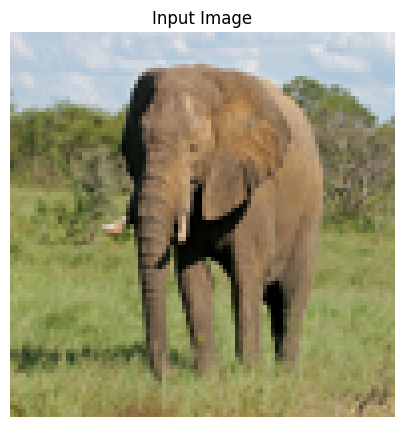

In [29]:
from urllib.request import urlretrieve
from PIL import Image

img_url = "https://storage.googleapis.com/tensorflow/keras-applications/tests/elephant.jpg"
urlretrieve(img_url, "test_image.jpg")

# Load and resize to smaller dimensions
img_size = (96, 96)
img = Image.open("test_image.jpg").convert('RGB')
img = img.resize(img_size)
img_array = np.array(img)

# Display the input image
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title("Input Image")
plt.axis('off')
plt.show()

# convert to float32 
x = img_array.astype(np.float32)
# model expects [-1, 1] range
x = x / 127.5 - 1.0  
x = np.expand_dims(x, axis=0)  # Add batch dimension

Creating explainer...
Getting model prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Top 3 predictions:
1. tusker (0.6181)
2. African_elephant (0.2413)
3. Indian_elephant (0.0588)
Generating explanation...
Time taken: 15.30 seconds
Visualizing results...
Plot saved to occlusion_demo.png


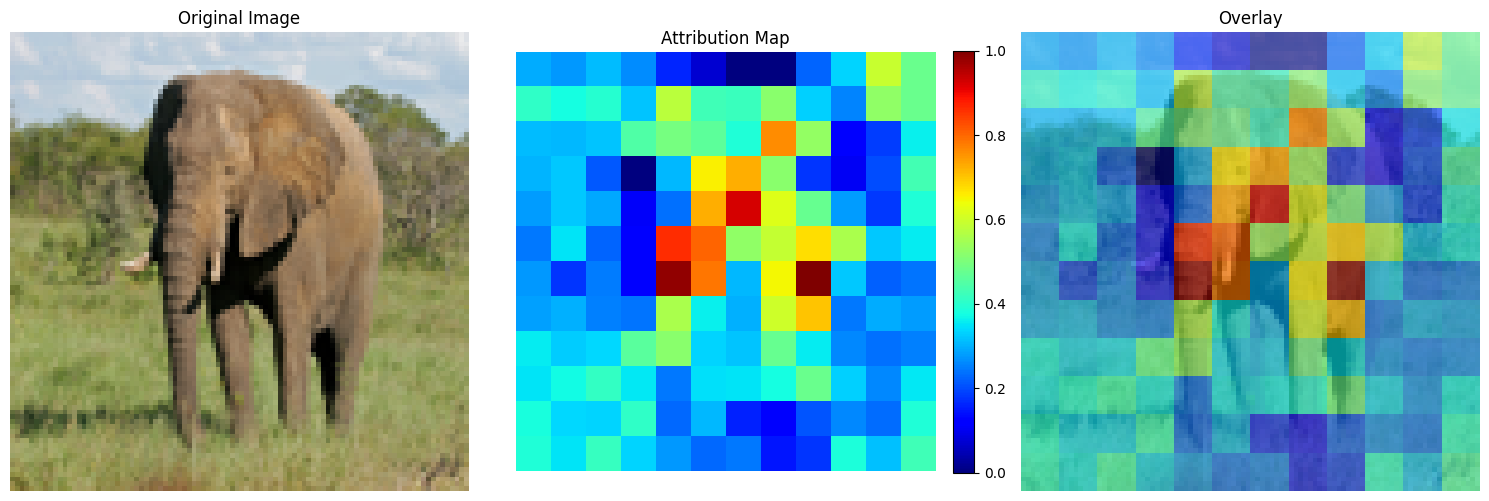

In [30]:
print("Creating explainer...")
explainer = OcclusionSensitivity(
    model, 
    window_size=(8, 8),  
    stride=(8, 8),       
    occlusion_value=0.0
)

print("Getting model prediction...")
preds = model.predict(x)
top_indices = np.argsort(preds[0])[-3:][::-1]
top_confidences = preds[0][top_indices]
class_names = decode_predictions(preds, top=3)[0]


print("\nTop 3 predictions:")
for i, (_, name, conf) in enumerate(class_names):
    print(f"{i+1}. {name} ({top_confidences[i]:.4f})")


print("Generating explanation...")
start_time = time.time()
explanation = explainer.explain(x, targets=target_class)
elapsed = time.time() - start_time
print(f"Time taken: {elapsed:.2f} seconds")

print("Visualizing results...")
vizualize(explanation, img_array, save_path="occlusion_demo.png")